## Análise Exploratória de Dados - Previsão de Churn de Clientes Olist

**Autor:** Diego Fonseca

**Data:** 11 de julho de 2025

---

### 1. Objetivo de Negócio

O principal objetivo deste projeto é desenvolver uma solução de dados para mitigar a perda de receita causada pelo cancelamento de clientes (churn) na plataforma de e-commerce Olist. Ao identificar proativamente os clientes com alta probabilidade de churn, a empresa pode criar campanhas de retenção direcionadas, aumentando a lealdade e o Lifetime Value (LTV) do cliente.

### 2. Objetivo Deste Notebook

O objetivo específico deste notebook de Análise Exploratória de Dados (EDA) é realizar uma investigação profunda nos dados para extrair insights e compreender os fatores que influenciam o churn. As principais metas são:
* Analisar a distribuição e as características de cada variável.
* Identificar padrões e correlações entre as features e a variável alvo (`churn`).
* Formular hipóteses que serão testadas e validadas na etapa de modelagem.
* Verificar a qualidade dos dados e a necessidade de limpeza ou transformação para a etapa de pré-processamento.

### 3. Perguntas a Serem Respondidas

Para guiar nossa análise, buscaremos responder às seguintes perguntas:

1. Existe alguma relação de um cliente ter dado uma nota ruim e depois ter virado churn?

2. Clientes que compram produtos mais caros tem tendência de virar churn? Ou é o contrário?

3. O tipo de pagamento tem alguma relação se o cliente virou churn ou não?

4. A quantidade de parcelas de uma compra interferiu na decisão de ser churn?

5. Das 10 categorias de produtos mais vendidos, quais que deram mais churn? E das 10 categorias de produtos menos vendidos?


---

#### Importando as bibliotecas

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Arquivo contendo funções para ajudar na análise exploratória
import sys
sys.path.append('../utils')

# Funções auxiliares para fazer a análise exploratória
from eda_funcoes import valores_outliers, mostrar_distribuicao_dados_numericos, gerar_boxplot, regra_sturges, calcular_iv, gerar_tabela_contigencia, segmentar_dados_numericos_categoricos

# Refere-se a bibliotecas para calcular estatísticas inferenciais
from scipy import stats
from scipy.stats import chi2_contingency


# Configurar para não exibir warnings
from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option("display.max_columns", None)

#### Importando as bases de dados que vão compor a análise

In [79]:
# Base de dados de clientes
clientes = pd.read_csv("../data/data_raw/olist_customers_dataset.csv")
print("Dados clientes")
display(clientes.head(2))
print()

# Base de dados de pedido (base principal)
pedidos = pd.read_csv("../data/data_raw/olist_orders_dataset.csv")
print("Dados de pedidos")
display(pedidos.head(2))
print()

# Base de dados dos itens do pedido
itens_pedidos = pd.read_csv("../data/data_raw/olist_order_items_dataset.csv")
print("Dados dos itens dos pedidos")
display(itens_pedidos.head(2))
print()

# Base de dados de pagamentos dos pedidos
pagamentos = pd.read_csv("../data/data_raw/olist_order_payments_dataset.csv")
print("Dados dos pagamentos dos pedidos")
display(pagamentos.head(2))
print()

# Base de dados de produtos dos pedidos
produtos = pd.read_csv("../data/data_raw/olist_products_dataset.csv")
print("Dados dos produtos")
display(produtos.head(2))
print()

# Base de dados das avaliações dos pedidos
avaliacoes = pd.read_csv("../data/data_raw/olist_order_reviews_dataset.csv")
print("Dados das avaliações dos pedidos")
display(avaliacoes.head(2))
print()

Dados clientes


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP



Dados de pedidos


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00



Dados dos itens dos pedidos


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93



Dados dos pagamentos dos pedidos


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39



Dados dos produtos


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0



Dados das avaliações dos pedidos


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


- Depois de importar todas as bases de dados, vamos pegar as colunas mais importantes de cada base para juntar em uma base só. Ela será a base principal para fazer os tratamentos e análises.

In [80]:
# As colunas das bases que vão integrar a base principal
colunas_clientes = ['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']
colunas_itens_pedidos = ['order_id', 'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value']
colunas_pagamentos = ['order_id', 'payment_type', 'payment_installments']
colunas_produtos = ['product_id', 'product_category_name']
colunas_avaliacoes = ['order_id', 'review_score', 'review_answer_timestamp']

In [81]:
# Juntando a base de dados de clientes na base de pedidos
pedidos = pd.merge(
            left=pedidos, 
            right=clientes[colunas_clientes], 
            how='inner',
            on='customer_id')

# Juntando a base de dados de itens na base de pedidos
pedidos = pd.merge(
            left=pedidos, 
            right=itens_pedidos[colunas_itens_pedidos],
            how='inner',
            on='order_id')

# Juntando a base de dados de pagamentos na base de pedidos
pedidos = pd.merge(
            left=pedidos, 
            right=pagamentos[colunas_pagamentos],
            how='inner',
            on='order_id')  

# Juntando a base de dados de produtos na base de pedidos
pedidos = pd.merge(
            left=pedidos, 
            right=produtos[colunas_produtos],
            how='inner',
            on='product_id') 

# Juntando a base de dados de avaliações na base de pedidos
pedidos = pd.merge(
            left=pedidos, 
            right=avaliacoes[colunas_avaliacoes],
            how='inner',
            on='order_id') 

pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,payment_type,payment_installments,product_category_name,review_score,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,credit_card,1,utilidades_domesticas,4,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,1,utilidades_domesticas,4,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,1,utilidades_domesticas,4,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,boleto,1,perfumaria,4,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,credit_card,3,automotivo,5,2018-08-22 19:07:58


Vamos apagar algumas colunas que não serão necessárias para a análise.

In [82]:
# Apagando colunas desnecessárias
colunas_remover = ['customer_id', 'order_delivered_carrier_date']
pedidos = pedidos.drop(columns=colunas_remover, axis=1)

Depois de juntar as colunas importantes para a análise, vamos fazer a etapa de entendimento dos dados.

#### Entendendo os dados

In [83]:
# Verificando o tamanho da base de dados
print(f'Quantidade de linhas: {pedidos.shape[0]}')
print(f'Quantidade de colunas: {pedidos.shape[1]}')

Quantidade de linhas: 117329
Quantidade de colunas: 19


In [84]:
# Pegando as informações dos dados
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   order_status                   117329 non-null  object 
 2   order_purchase_timestamp       117329 non-null  object 
 3   order_approved_at              117314 non-null  object 
 4   order_delivered_customer_date  114858 non-null  object 
 5   order_estimated_delivery_date  117329 non-null  object 
 6   customer_unique_id             117329 non-null  object 
 7   customer_city                  117329 non-null  object 
 8   customer_state                 117329 non-null  object 
 9   order_item_id                  117329 non-null  int64  
 10  product_id                     117329 non-null  object 
 11  seller_id                      117329 non-null  object 
 12  price                         

Podemos perceber que as colunas de datas não estão com o tipo datetime e sim como object, vai ser preciso trocar o tipo dessas colunas para datetime.

In [85]:
# Verificando se possui valores vazios em porcentagem
prcentagem_de_vazios = ((pedidos.isna().sum() / pedidos.shape[0]) * 100).round(2)
prcentagem_de_vazios

order_id                         0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.01
order_delivered_customer_date    2.11
order_estimated_delivery_date    0.00
customer_unique_id               0.00
customer_city                    0.00
customer_state                   0.00
order_item_id                    0.00
product_id                       0.00
seller_id                        0.00
price                            0.00
freight_value                    0.00
payment_type                     0.00
payment_installments             0.00
product_category_name            1.44
review_score                     0.00
review_answer_timestamp          0.00
dtype: float64

Temos 4 colunas com valores vazios, apesar de ser uma porcentagem pouca vamos entender melhor o porque de estarem assim.

In [86]:
# Verificando se possui valores duplicados
print(f'Quantidade de valores duplicados: {pedidos.duplicated().sum()}')

Quantidade de valores duplicados: 2310


In [87]:
# Informações descritivas dos dos dados
pedidos.describe(include='all')

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,payment_type,payment_installments,product_category_name,review_score,review_answer_timestamp
count,117329,117329,117329,117314,114858,117329,117329,117329,117329,117329.000000,117329,117329,117329.000000,117329.000000,117329,117329.000000,115634,117329.000000,117329
unique,97916,7,97370,89533,95021,449,94720,4108,27,NaN,32789,3090,NaN,NaN,4,NaN,73,NaN,97546
top,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-14 12:46:18,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,credit_card,NaN,cama_mesa_banho,NaN,2017-08-17 22:17:55
freq,63,114859,63,63,63,652,75,18582,49527,NaN,533,2128,NaN,NaN,86520,NaN,11847,NaN,63
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.194121,NaN,NaN,120.524349,20.027514,NaN,2.940151,NaN,4.031467,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.684225,NaN,NaN,182.944843,15.828077,NaN,2.775370,NaN,1.387927,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.850000,0.000000,NaN,0.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,39.900000,13.080000,NaN,1.000000,NaN,4.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,74.900000,16.280000,NaN,2.000000,NaN,5.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,134.900000,21.180000,NaN,4.000000,NaN,5.000000,NaN


In [88]:
# Verificando a quantidade de valores únicos para cada variável
valores_distintos = pd.DataFrame({'Colunas': pedidos.nunique().index, 'Quantidades Valores Distintos': pedidos.nunique().values})
valores_distintos

,Colunas,Quantidades Valores Distintos
0,order_id,97916
1,order_status,7
2,order_purchase_timestamp,97370
3,order_approved_at,89533
4,order_delivered_customer_date,95021
5,order_estimated_delivery_date,449
6,customer_unique_id,94720
7,customer_city,4108
8,customer_state,27
9,order_item_id,21


Transformando as colunas de datas que estão com o tipo object para o tipo datetime.

In [89]:
# Criando uma lista contendo as colunas que são datas e estão com o tipo de object
colunas_de_datas = ['order_purchase_timestamp', 'order_delivered_customer_date','order_estimated_delivery_date',
                    'review_answer_timestamp', 'order_approved_at']

# Transformando as colunas de datas para o tipo datetime
for coluna in colunas_de_datas:
    pedidos[coluna] = pd.to_datetime(pedidos[coluna], errors='coerce')

Criando a coluna total que vai somar o valor do produto e o frete de cada pedido.

In [90]:
# Criação da coluna total que soma o preço do produto e o valor do frete
pedidos['total'] = pedidos['price'] + pedidos['freight_value']

#### Análise Univariada

Separando as colunas por tipo

In [91]:
# Colunas categóricas
colunas_categoricas = ['order_id', 'order_status', 'customer_unique_id', 'product_id', 'customer_state',
                       'customer_city', 'seller_id', 'payment_type', 'product_category_name']

# Colunas numéricas inteiras
colunas_numericas_inteiras = ['order_item_id', 'payment_installments', 'review_score']

# Colunas numéricas tipo float
colunas_numericas_flutuantes = ['price', 'freight_value', 'payment_value']

# Colunas de datas
colunas_datas = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 
                 'order_estimated_delivery_date', 'review_answer_timestamp']

##### Colunas Categóricas

<strong>Coluna order_id</strong>

In [92]:
# Verificando a distribuição dos pedidos através da coluna order_id
pedidos['order_id'].describe().reset_index()

,index,order_id
0,count,117329
1,unique,97916
2,top,895ab968e7bb0d5659d16cd74cd1650c
3,freq,63


- Temos um total de 97916 pedidos

<strong>Coluna order_status</strong>

In [93]:
# Pegando mais informações sobre o order_status
pedidos['order_status'].describe().reset_index()

,index,order_status
0,count,117329
1,unique,7
2,top,delivered
3,freq,114859


In [94]:
# Verificando a quantidade de pedidos por status
pedidos.groupby('order_status')['order_status'].count().reset_index(name='Qtd por Status')

,order_status,Qtd por Status
0,approved,3
1,canceled,553
2,delivered,114859
3,invoiced,370
4,processing,370
5,shipped,1167
6,unavailable,7


- Possui 7 status do pedido;
- O status delivered é o que mais teve, significando que quase todos os pedidos foram entregues.
- Tem 553 pedidos cancelados e 7 indisponíveis.

<strong>Coluna customer_unique_id</strong>

In [95]:
# Mais informações sobre o cliente
pedidos['customer_unique_id'].describe().reset_index()

,index,customer_unique_id
0,count,117329
1,unique,94720
2,top,9a736b248f67d166d2fbb006bcb877c3
3,freq,75


- Temos um total de 94720 clientes.

<strong>Coluna product_id</strong>

In [96]:
# Mais informações sobre os produtos
pedidos['product_id'].describe().reset_index()

,index,product_id
0,count,117329
1,unique,32789
2,top,aca2eb7d00ea1a7b8ebd4e68314663af
3,freq,533


- Temos um total de 32789 produtos.

<strong>Coluna payment_type</strong>

In [97]:
# Verificando a quantidade de pedidos por tipos de pagamentos
pedidos.groupby('payment_type')['payment_type'].count().reset_index(name='Qtd por Tipo de Pagamento')

,payment_type,Qtd por Tipo de Pagamento
0,boleto,22835
1,credit_card,86520
2,debit_card,1692
3,voucher,6282


- A grande maioria dos pedidos foram pagos usando o cartão de crédito e boleto.

<strong>Coluna customer_city</strong>

In [98]:
# Verificar as informações da cidade
pedidos['customer_city'].describe().reset_index()

,index,customer_city
0,count,117329
1,unique,4108
2,top,sao paulo
3,freq,18582


- Temos um total de 4108 cidades.

<strong>Coluna customer_state</strong>

In [99]:
pedidos.groupby('customer_state')['customer_state'].count().reset_index(name='Qtd de Pedidos por Estado')

,customer_state,Qtd de Pedidos por Estado
0,AC,95
1,AL,459
2,AM,170
3,AP,83
4,BA,4014
5,CE,1545
6,DF,2482
7,ES,2319
8,GO,2416
9,MA,843


- Os estados que mais tiveram pedidos foi SP, RJ e MG.

##### Colunas Numéricas

<strong>Coluna review_score</strong>

In [100]:
# Verificando a distribuição dos review score
pedidos['review_score'].describe().reset_index()

,index,review_score
0,count,117329.000000
1,mean,4.031467
2,std,1.387927
3,min,1.000000
4,25%,4.000000
5,50%,5.000000
6,75%,5.000000
7,max,5.000000


In [101]:
# Verificando a quantidade de pedidos por status
review_score = pedidos.groupby('review_score')['review_score'].count().reset_index(name='Qtd por Review Score')
review_score['Freq Relativa'] = ((review_score['Qtd por Review Score'] / np.sum(review_score['Qtd por Review Score'])) * 100).round(2)
review_score

,review_score,Qtd por Review Score,Freq Relativa
0,1,14854,12.66
1,2,4085,3.48
2,3,9840,8.39
3,4,22286,18.99
4,5,66264,56.48


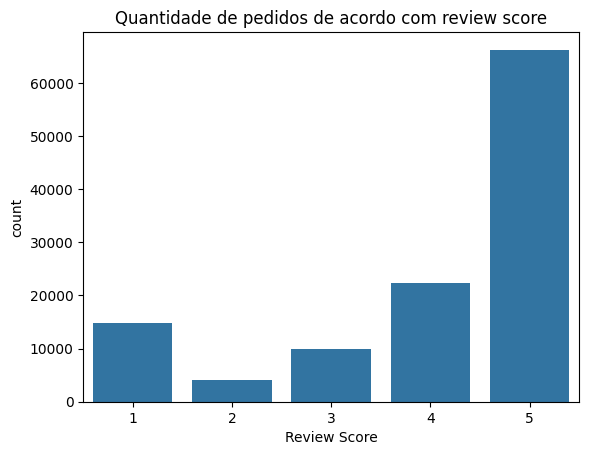

In [102]:
sns.countplot(pedidos, x="review_score")
plt.title("Quantidade de pedidos de acordo com review score")
plt.xlabel("Review Score")
plt.show()

- A maioria dos pedidos tiveram um review score com a nota máxima de 5 que equivale a 56,48%.
- O segundo maior review score é a nota 4 e depois a nota 1, que equivale respectivamente 18,99% e 12,66%.
- Apesar de muitos pedidos com a nota 5, ainda temos muitos pedidos com notas baixas.

<strong>Coluna price</strong>

In [103]:
# Verificando a distribuição dos preços
pedidos['price'].describe().reset_index()

,index,price
0,count,117329.000000
1,mean,120.524349
2,std,182.944843
3,min,0.850000
4,25%,39.900000
5,50%,74.900000
6,75%,134.900000
7,max,6735.000000


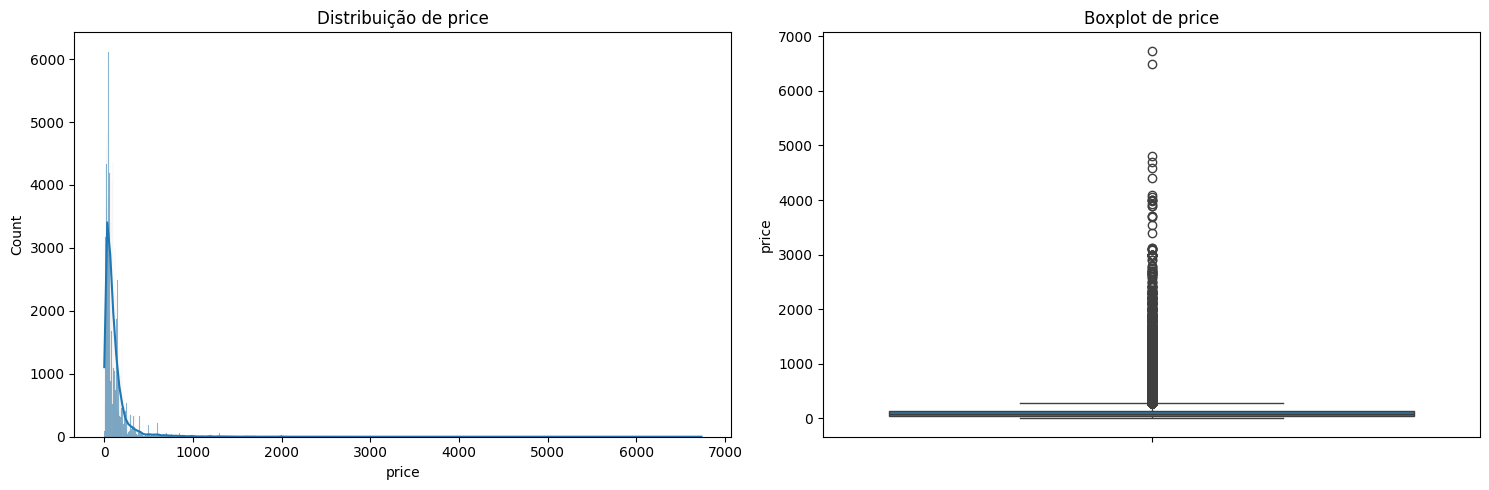

In [104]:
# Verificando a distribuição dos dados da coluna price
mostrar_distribuicao_dados_numericos(pedidos, 'price')

- Percebemos que a coluna ``price`` possui muitos valores considerados outliers.
- E devido esses outliers, está puxando a média dos preços para cima.
- A mediano do preço é 74,90 enquanto a média está 120,52.
- O menor preço é 0,85 e o maior preço é 6735.

In [105]:
# Verificando quais são esses valores outliers
outliers, (limite_inferior, limite_superior) = valores_outliers(pedidos, 'price')
print(f"Valores abaixo de {limite_inferior} são outliers.")
print(f"Valores acima de {limite_superior} são outliers.")

Valores abaixo de -102.6 são outliers.
Valores acima de 277.4 são outliers.


<strong>Coluna freight_value</strong>

In [106]:
# Verificando a distribuição dos fretes
pedidos['freight_value'].describe().reset_index()

,index,freight_value
0,count,117329.000000
1,mean,20.027514
2,std,15.828077
3,min,0.000000
4,25%,13.080000
5,50%,16.280000
6,75%,21.180000
7,max,409.680000


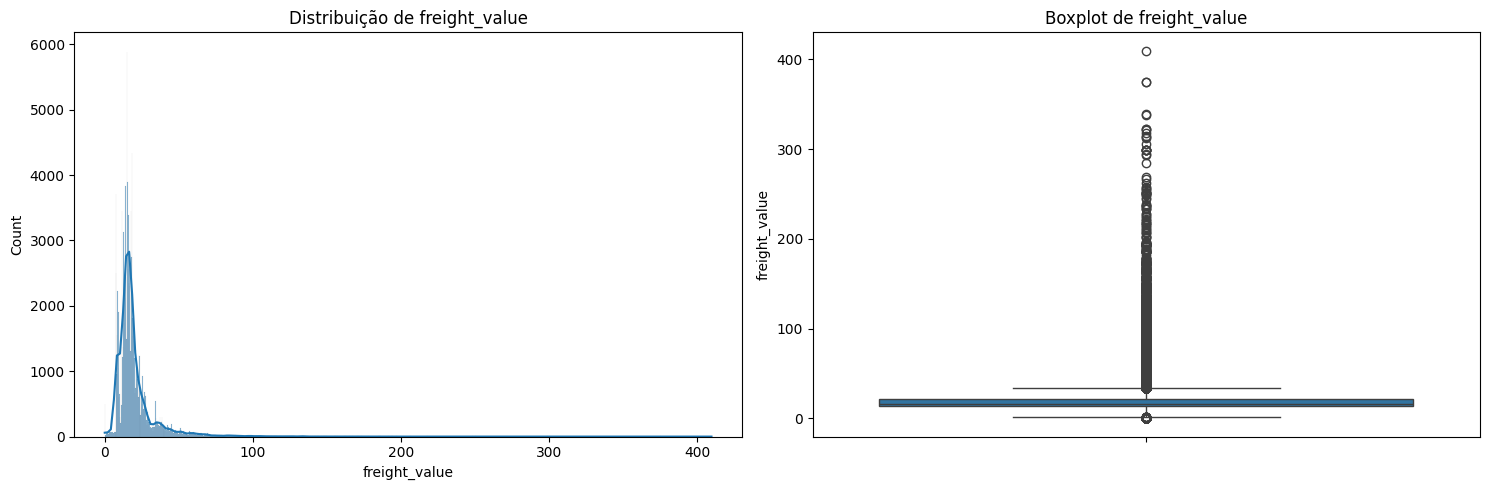

In [107]:
# Verificando a distribuição dos dados da coluna freight_value
mostrar_distribuicao_dados_numericos(pedidos, 'freight_value')

- A coluna do valor do frete também possui muitos outliers.
- A média está sendo impactada por esses outliers, pois a mediana é 16,28 e a média é 20,02.
- O menor valor de frete é 0,00 e o maior é 409,68.

In [108]:
# Verificando quais são esses valores outliers
outliers_frete, (limite_inferior_frete, limite_superior_frete) = valores_outliers(pedidos, 'freight_value')
print(f"Valores abaixo de {limite_inferior_frete:.2f} são outliers.")
print(f"Valores acima de {limite_superior_frete} são outliers.")

Valores abaixo de 0.93 são outliers.
Valores acima de 33.33 são outliers.


#### Análise Bivariada

<strong>Colunas price e freight_value</strong>

In [109]:
# Verificando a correlação entre o preço e o valor do frete
pedidos[['price', 'freight_value']].corr()

,price,freight_value
price,1.000000,0.414014
freight_value,0.414014,1.000000


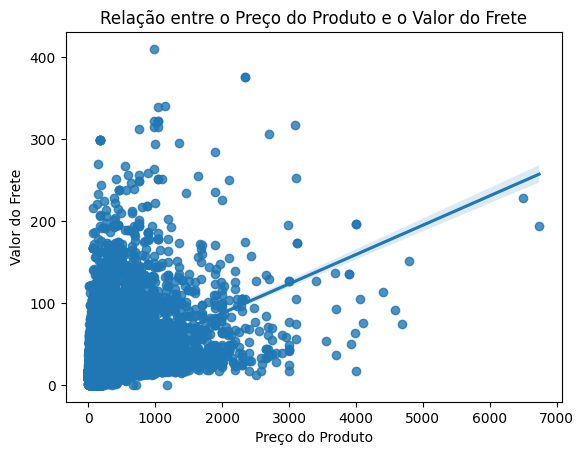

In [110]:
# Verificando se possui uma relação o preço com o valor do frete
sns.regplot(data=pedidos, x="price", y="freight_value")

plt.title("Relação entre o Preço do Produto e o Valor do Frete")
plt.xlabel("Preço do Produto")
plt.ylabel("Valor do Frete")
plt.show()

- Percebe-se que o preço do produto e o valor do frete possui uma correlação fraca.
- Mostra que nem sempre que o preço do produto é maior que o valor do frete também vai ser maior.

<strong>Colunas price e review_score</strong>

In [111]:
# Verificando se possui uma correlação entre o preço e a pontuação dada pelo cliente
pedidos[['price', 'review_score']].corr()

,price,review_score
price,1.000000,-0.004515
review_score,-0.004515,1.000000


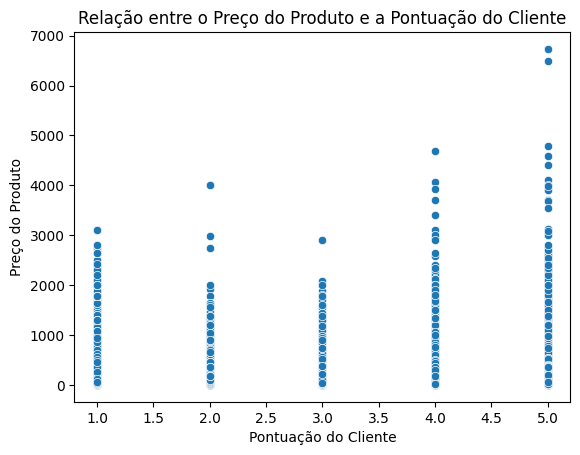

In [112]:
# Verificando uma relação entre o preço do produto e a pontuação dada pelo cliente
sns.scatterplot(data=pedidos, x="review_score", y="price")

plt.title("Relação entre o Preço do Produto e a Pontuação do Cliente")
plt.ylabel("Preço do Produto")
plt.xlabel("Pontuação do Cliente")
plt.show()

- Percebe-se que não possui uma correlação entre o preço e a nota do cliente.
- Produtos mais caros tiveram uma pontuação melhor.

<strong>Colunas order_status e review_score</strong>

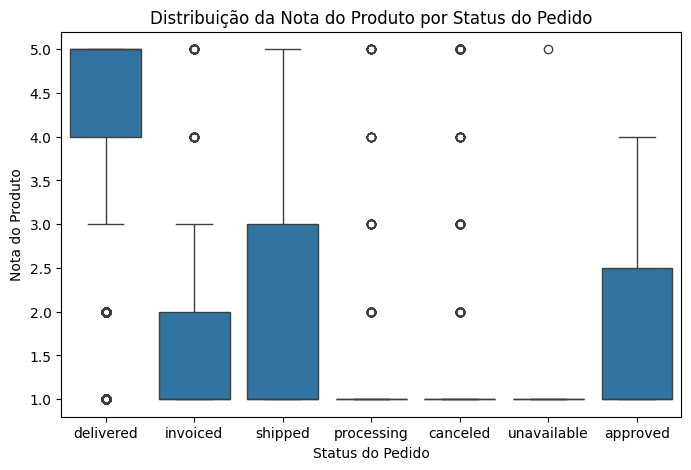

In [113]:
# Verificando a distribuição da nota do produto dado pelo cliente e o status do pedido
plt.figure(figsize=(8, 5))
sns.boxplot(data=pedidos, x='order_status', y='review_score')
plt.title('Distribuição da Nota do Produto por Status do Pedido')
plt.xlabel("Status do Pedido")
plt.ylabel("Nota do Produto")
plt.show()

- A grande maioria dos produtos que foram entregues tiveram notas mais altas.
- Pedidos cancelados tiveram notas mais baixas, como era de se esperar.
- Percebe-se que contas aprovadas está com notas mais baixas.

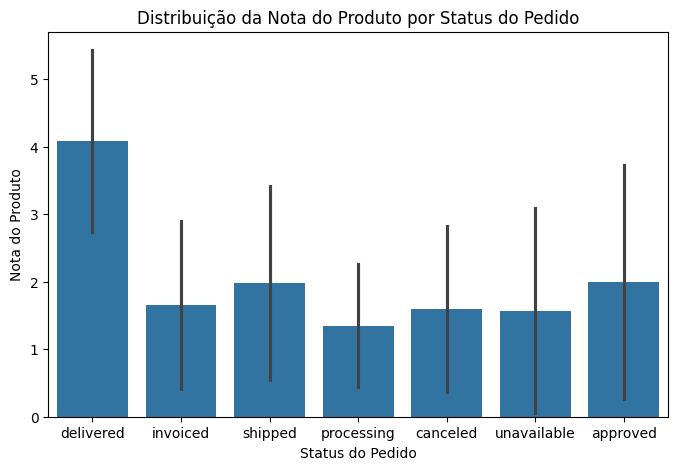

In [114]:
plt.figure(figsize=(8, 5))
sns.barplot(data=pedidos, x='order_status', y='review_score', ci='sd')
plt.title('Distribuição da Nota do Produto por Status do Pedido')
plt.xlabel("Status do Pedido")
plt.ylabel("Nota do Produto")
plt.show()

- Nesse gráfico percebemos o mesmo comportamento, a diferença é que nesse conseguimos ver o quanto os dados estão dispersos em cada status do pedido.

<strong>Colunas product_category_name e review_score</strong>

Vamos pegar as 10 categorias de produtos mais vendidos e vamos analisar com a pontuação do produto

In [115]:
# Pegar as 10 categorias que mais teve pedidos
top_10_categorias= pedidos['product_category_name'].value_counts().head(10).index

pedidos_top_categorias = pedidos[pedidos['product_category_name'].isin(top_10_categorias)]

pedidos_top_categorias.groupby('product_category_name')['review_score'].agg(['mean', 'median', 'count', 'std'])


,mean,median,count,std
product_category_name,,,,
automotivo,4.064279,5.0,4356,1.354162
beleza_saude,4.137973,5.0,9944,1.335905
cama_mesa_banho,3.890605,5.0,11847,1.451397
esporte_lazer,4.107470,5.0,8942,1.352101
ferramentas_jardim,4.023914,5.0,4558,1.399112
informatica_acessorios,3.936089,5.0,8105,1.446346
moveis_decoracao,3.912158,5.0,8743,1.462352
relogios_presentes,4.017692,5.0,6161,1.391012
telefonia,3.948849,5.0,4692,1.386333


- Possível ver que as 10 maiores categorias de produtos tiveram nota máxima de acordo com a mediana.
- De acordo com a média essas notas variaram um pouco.
- Mostra que categorias mais vendidas tiveram notas mais altas.

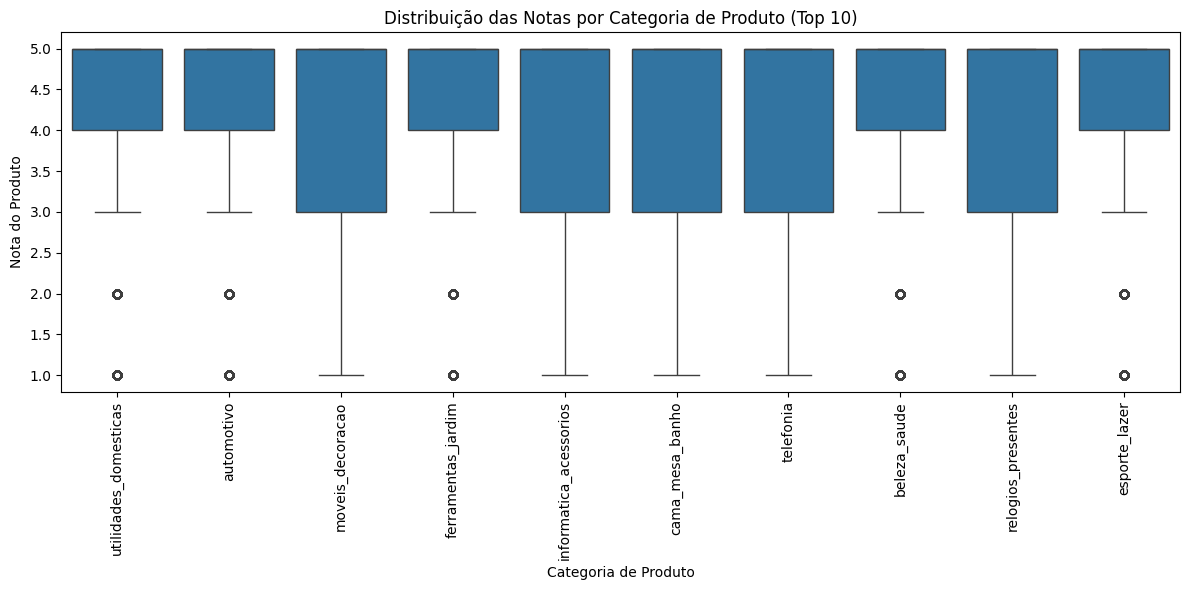

In [116]:
# Verificando a distribuição das top 10 categorias de produtos pela nota dado ao pedido pelo cliente
plt.figure(figsize=(12, 6))
sns.boxplot(data=pedidos_top_categorias, x='product_category_name', y='review_score')
plt.xticks(rotation=90)
plt.title('Distribuição das Notas por Categoria de Produto (Top 10)')
plt.ylabel('Nota do Produto')
plt.xlabel('Categoria de Produto')
plt.tight_layout()
plt.show()

- O gráfico mostra que todas as top 10 categorias tiveram algumas notas baixas, mas que no todo elas tiraram notas mais altas.
- Para algumas categorias as notas baixas se tornaram valores outliers.

<strong>Colunas seller_id e review_score</strong>

Vamos pegar os 10 vendedores que mais venderam e vamos analisar a relação que eles tiveram com a nota do pedido.

In [117]:
# Pegar os 10 vendedores que mais teve pedidos
top_10_vendedores= pedidos['seller_id'].value_counts().head(10).index

pedidos_top_vendedores = pedidos[pedidos['seller_id'].isin(top_10_vendedores)]

pedidos_top_vendedores.groupby('seller_id')['review_score'].agg(['mean', 'median', 'count', 'std'])

,mean,median,count,std
seller_id,,,,
1025f0e2d44d7041d6cf58b6550e0bfa,3.862116,5.0,1465,1.480785
1f50f920176fa81dab994f9023523100,3.981583,5.0,2009,1.447336
4a3ca9315b744ce9f8e9374361493884,3.801692,4.0,2128,1.456518
6560211a19b47992c3666cc44a7e94c0,3.909522,5.0,2111,1.405763
7a67c85e85bb2ce8582c35f2203ad736,4.226537,5.0,1236,1.215477
7c67e1448b00f6e969d365cea6b010ab,3.394773,4.0,1454,1.546125
955fee9216a65b617aa5c0531780ce60,4.054713,5.0,1517,1.307190
cc419e0650a3c5ba77189a1882b7556a,4.050928,5.0,1885,1.381772
da8622b14eb17ae2831f4ac5b9dab84a,4.071256,5.0,1656,1.347616


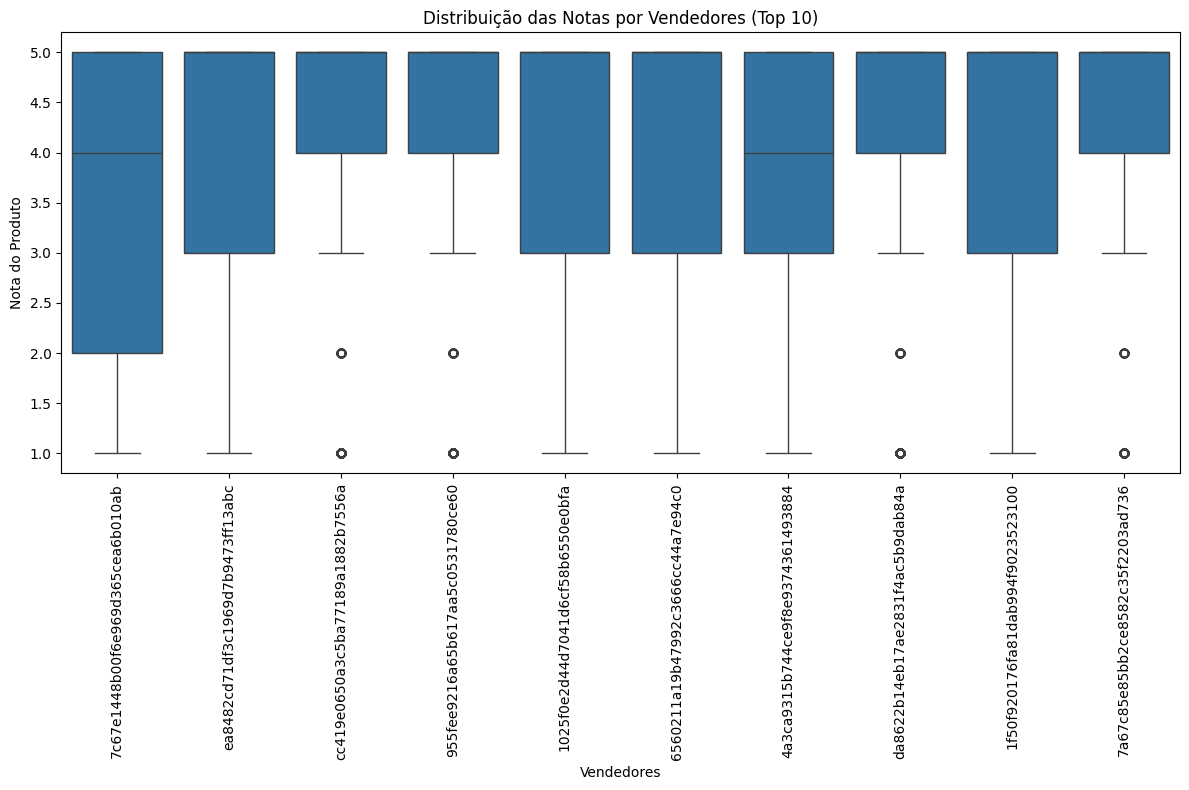

In [118]:
# Verificando a distribuição dos top 10 vendedores pela nota dado ao pedido pelo cliente
plt.figure(figsize=(12, 8))
sns.boxplot(data=pedidos_top_vendedores, x='seller_id', y='review_score')
plt.xticks(rotation=90)
plt.title('Distribuição das Notas por Vendedores (Top 10)')
plt.ylabel('Nota do Produto')
plt.xlabel('Vendedores')
plt.tight_layout()
plt.show()

- Os vendedores que mais venderam tiraram notas mais altas, mas também tirou notas baixas.
- Quando olha para os vendedores as notas variaram mais e tiveram mais notas baixas.

<strong>Colunas order_delivered_customer_date, order_estimated_delivery_date e review_score</strong>

Vamos criar uma coluna que contém a diferença da data que foi entregue o pedido com a estimativa de entrega na hora da compra. Ver se possui alguma relação o atraso ou adiantamento do pedido com a nota recebida do pedido. Valores positivos significa que a entrega do pedido adiantou e valores negativos significa que a entrega atrasou.

In [119]:
# Criando uma coluna que ver a diferença de dias na data estimada de entrega no dia da compra com a data que foi entregue
pedidos['difference_between_delivery_and_estimated_date'] = (pedidos['order_estimated_delivery_date'] - pedidos['order_delivered_customer_date']).dt.days

# Verificar a distribuição dessa nova coluna de dias
pedidos['difference_between_delivery_and_estimated_date'].describe().reset_index()

,index,difference_between_delivery_and_estimated_date
0,count,114858.000000
1,mean,11.084574
2,std,10.094451
3,min,-189.000000
4,25%,6.000000
5,50%,12.000000
6,75%,16.000000
7,max,146.000000


In [120]:
percentil_10 = pedidos['difference_between_delivery_and_estimated_date'].quantile(0.10)
print(f"10% dos valores dos dias de adiantamento ou atraso das entregas está abaixo ou igual a {percentil_10}")

10% dos valores dos dias de adiantamento ou atraso das entregas está abaixo ou igual a 1.0


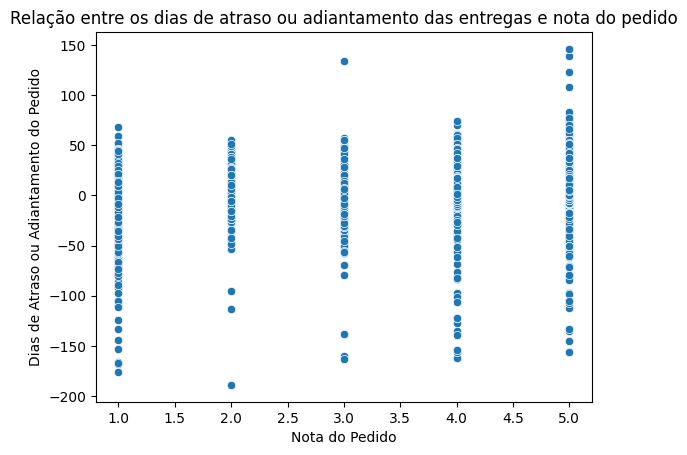

In [121]:
sns.scatterplot(data=pedidos, y='difference_between_delivery_and_estimated_date', x='review_score')
plt.title("Relação entre os dias de atraso ou adiantamento das entregas e nota do pedido")
plt.xlabel("Nota do Pedido")
plt.ylabel("Dias de Atraso ou Adiantamento do Pedido")
plt.show()

- Percebe-se que mesmo tendo atraso na entrega, alguns pedidos ainda assim tiraram nota máxima.
- Menos de 10% dos valores tiveram atraso na entrega.
- Olhando para os dados descritivos e para gráfico não é possível ver uma relação de atrasos com notas baixas.

#### Respondendo Algumas Perguntas

Antes de responder algumas perguntas é preciso ser criada a coluna de clientes que são churn. Para a criação dessa coluna vamos pegar a recência e depois estipular o período desde a última compra para declarar se o cliente é churn ou não.

In [122]:
# Pegando a última data de compra de toda a base de dados
data_ultima_compra = pedidos['order_purchase_timestamp'].max()

# Criando a coluna de Recência para criar depois a coluna de churn
pedidos['recency'] = (data_ultima_compra - pedidos.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')).dt.days

# Definindo o período que vai ser considerado como churn
periodo_churn = 365
pedidos['churn'] = np.where(pedidos['recency'] > periodo_churn, 1, 0)
pedidos.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,payment_type,payment_installments,product_category_name,review_score,review_answer_timestamp,total,difference_between_delivery_and_estimated_date,recency,churn
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,credit_card,1,utilidades_domesticas,4,2017-10-12 03:43:48,38.71,7.0,335,0
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,1,utilidades_domesticas,4,2017-10-12 03:43:48,38.71,7.0,335,0
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,1,utilidades_domesticas,4,2017-10-12 03:43:48,38.71,7.0,335,0
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,boleto,1,perfumaria,4,2018-08-08 18:37:50,141.46,5.0,40,0
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,credit_card,3,automotivo,5,2018-08-22 19:07:58,179.12,17.0,26,0


<strong>Verificando a distribuição da coluna churn</strong>

In [123]:
pedidos['churn'].value_counts(normalize=True).reset_index(name='Freq Relativa')

,churn,Freq Relativa
0,0,0.768983
1,1,0.231017


- Podemos ver que temos uma classe desbalanceada. Possuimos mais valores que não é churn.

<strong>1) Existe alguma relação de um cliente ter dado uma nota ruim e depois ter virado churn?</strong>

In [124]:
# Verificar a relação de review_score e churn usando uma tabela de contigencia
gerar_tabela_contigencia(pedidos, "review_score", "churn")

,Bom,Ruim
review_score,,
1,0.132526,0.106881
2,0.035024,0.034127
3,0.083215,0.086036
4,0.188520,0.194687
5,0.560716,0.578270


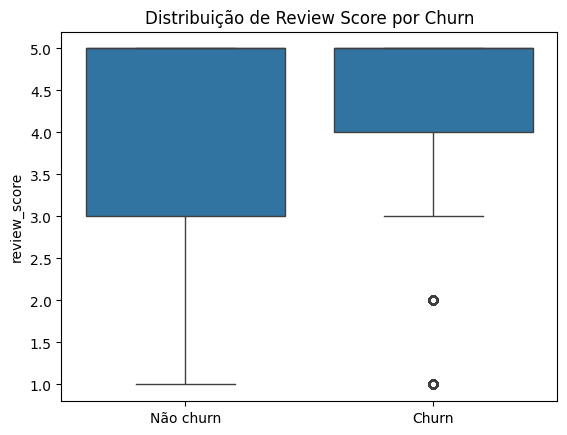

In [125]:
# Verificando a distribuição do review score pelo churn
sns.boxplot(data=pedidos, x="churn", y="review_score")
plt.title("Distribuição de Review Score por Churn")
plt.xticks([0, 1], ['Não churn', 'Churn'])
plt.xlabel('')
plt.show()

- O gráfico mostra que muitos dos clientes que deram churn deram notas mais altas em relação ao produto.
- Mostrou que 57.8% dos clientes que deram churn deram nota máxima que é 5.
- Nos clientes que não foram churn teve muitos que deram notas mais baixas em relação a quem deu churn.

In [126]:
# Calculando o IV
calcular_iv(pedidos, "review_score", "churn")

IV de review_score: 0.01
Poder de separação: Muito fraco


- Foi calculado o IV e podemos verificar que a variável review_score tem um poder de separação muito fraco, isso quer dizer que a variável não explica bem o churn.
- Foi possível ver isso nos gráficos.

<strong>2) Clientes que compram produtos mais caros tem tendência de virar churn? Ou é o contrário?</strong>

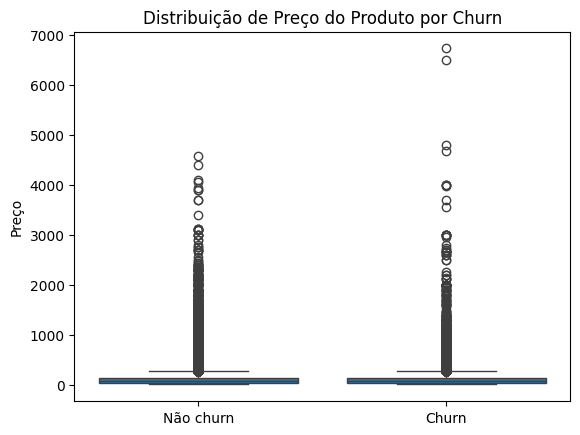

In [127]:
# Verificando a distribuição de price pelo churn
sns.boxplot(data=pedidos, x="churn", y="price")
plt.title("Distribuição de Preço do Produto por Churn")
plt.xticks([0, 1], ['Não churn', 'Churn'])
plt.ylabel("Preço")
plt.xlabel('')
plt.show()

- Não dá para ver uma relação direta entre o preço e o churn, as distribuições estão bem parecidas tanto de quem é churn de quem não é churn.
- Em alguns produtos muito caros, o cliente se tornou churn.
- Não ficou evidente que produtos mais caros ou mais barotos tendem a ser churn ou não.

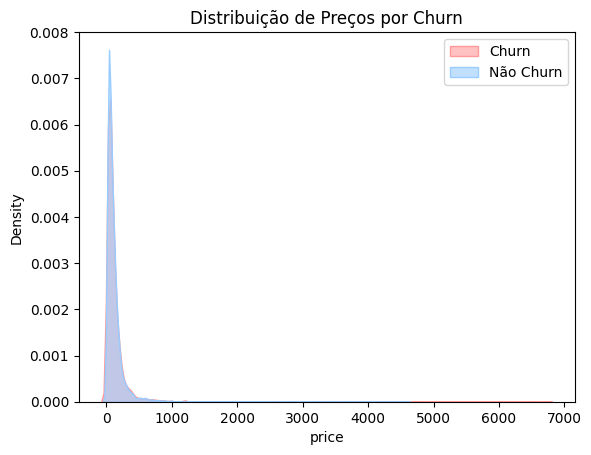

In [128]:
# Vendo a distribuição de preço de acordo se é churn ou não
sns.kdeplot(data=pedidos[pedidos['churn'] == 1]['price'], label='Churn', shade=True, color='#FF9999', alpha=0.6)
sns.kdeplot(data=pedidos[pedidos['churn'] == 0]['price'], label='Não Churn', shade=True, color='#99CCFF', alpha=0.6)
plt.title('Distribuição de Preços por Churn')
plt.legend()
plt.show()

- Pela distribuição podemos ver que o preço tem uma distribuição parecida seja para quem é churn ou não.
- Não podemos afirmar que preços mais caros ou mais baratos está atrelado ao churn.

<strong>Vamos usar um teste de hipótese não-paramétrico já que não temos uma distribuição normal para verificar se os preços altos estão empactando o churn ou não.</strong>

H0: Não há diferença significativa na mediana dos preços entre os clientes churn e não-churn. ``medidana_churn = mediana_nao_churn``

H1: Há uma diferença significativa na mediana dos preços entre os clientes churn e não-churn. Isso significa que o preço pode influenciar o churn. ``mediana_churn != mediana_nao_churn``

Nível de Significância = 5%

In [129]:
# Separando amostras de preços de churn e não churn
precos_churn = pedidos[pedidos['churn'] == 1]['price']
precos_nao_churn = pedidos[pedidos['churn'] == 0]['price']

# Calculando o teste de hipótese
statistic, p_value = stats.mannwhitneyu(precos_churn, precos_nao_churn, alternative='two-sided')

print(f'Mediana de preços de churn: {precos_churn.median()}')
print(f'Mediana de preços de não churn: {precos_nao_churn.median()}\n')

print(f"Estatística de Mann-Whitney U: {statistic}")
print(f"Valor p: {p_value}")

Mediana de preços de churn: 69.99
Mediana de preços de não churn: 75.0

Estatística de Mann-Whitney U: 1205283856.0
Valor p: 0.0003513540088331815


- Como o p-valor foi menor que o nível de confiança, rejeitamos H0. 
- Isso significa que há evidências estatísticas fortes e suficientes para afirmar que existe uma diferença significativa na distribuição dos preços entre os clientes que viram churn e os que não viram churn.
- Ao comparar as medianas de preços para clientes churn (69.99) é menor do que a mediana de preços para clientes não churn (75.00). A tendência é que clientes que compram produtos com preços mais baixos têm uma propensão maior a se tornarem churn.

<strong>Vamos olhar sobre a magnitude da diferença, que chamamos de tamanho do efeito, para isso vamos usar a medida de Correlação Bisseriana por Ranks (r), ela quantifica a força e a direção da relação entre o grupo (churn vs. não-churn) e a classificação (rank) dos preços.</strong>

1 - Valores próximos a 0 indicam um efeito pequeno.

2 - Valores de 0.1 a 0.3 são considerados um efeito pequeno.

3 - Valores de 0.3 a 0.5 são considerados um efeito médio.

4 - Valores acima de 0.5 são considerados um efeito grande.

In [130]:
# Calculando o tamanho do efeito usando o ranks
tamanho_amostra_churn = len(precos_churn)
tamanho_amostra_nao_churn = len(precos_nao_churn)
u_estatistica = statistic

r_rank = 1 - (2 * u_estatistica / (tamanho_amostra_churn * tamanho_amostra_nao_churn))

print(f'Correlação bisseriana por Rank (r): {r_rank:.4f}')

Correlação bisseriana por Rank (r): 0.0143


- Com o tamanho do efeito podemos ver que a diferença nas distribuições de preços entre clientes churn e não-churn é detectável estatisticamente devido ao grande tamanho da amostra, mas essa diferença tem um impacto muito pequeno na prática.
- Como o valor da correlação bisseriana por ranks é 0.0143, muito pequeno. Isso significa que a magnitude prática dessa diferença é mínima. Ou seja, o preço é um fator associado ao churn, mas a força dessa associação é muito fraca.

<strong>3) O tipo de pagamento tem alguma relação se o cliente virou churn ou não?</strong>

In [131]:
# Tabela para verificar a quantidade percentual de clientes virou churn de acordo com o tipo de pagamento
gerar_tabela_contigencia(pedidos, "payment_type", "churn")

,Bom,Ruim
payment_type,,
boleto,0.191102,0.206346
credit_card,0.743849,0.715993
debit_card,0.016293,0.008190
voucher,0.048756,0.069471


In [132]:
# Verificando através do IV para ver se o tipo de pagamento tem relação com o churn
calcular_iv(pedidos, "payment_type", "churn")

IV de payment_type: 0.02
Poder de separação: Muito fraco


- De acordo com o IV o tipo de pagamento tem um poder de separação muito fraco, isso significa que o tipo de pagamento quase não tem relação nenhuma, ele não teve interferência na decisão do cliente de se tornar churn.
- De acordo com a tabela de contigência, cerca de 71% dos clientes que se tornaram churn pagaram com o cartão de créidito. Logo em seguida vem o tipo de pagamento em boleto com 20%.
- Das pessoas que não se tornaram churn, 74% também pagaram com o cartão de crédito e 19% com o boleto.

<strong>Vamos realizar um teste de hipótese chamado Teste Qui-Quadrado de Independência para verificar se há uma relação entre as variáveis tipo de pagamento e churn.</strong>

H0: As duas variáveis são independentes (pu seja, não há relação entre o tipo de pagamento e o churn).

H1: As duas variáveis não são independentes (ou seja, há uma relação entre o tipo de pagamento e o churn)

In [133]:
# Criando a tabela de contigência em valores absolutos do tipo de pagamento 
tabela_contigencia_tipo_pagamento = pd.crosstab(pedidos['payment_type'], pedidos['churn'])
tabela_contigencia_tipo_pagamento.columns = ['não-churn', 'churn']

# Realizar o Teste Qui-Quadrado de Independência
# A função chi2_contingency retorna:
# - chi2: O valor da estatística qui-quadrado
# - p: O valor p do teste
# - dof: Graus de liberdade
# - expected: As frequências esperadas sob a hipótese nula de independência

chi2, p_value, dof, expected = chi2_contingency(tabela_contigencia_tipo_pagamento)

print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Graus de Liberdade (dof): {dof}")

Estatística Qui-Quadrado: 308.7374
Valor p: 0.0000
Graus de Liberdade (dof): 3


- Como o resultado do p-valor deu 0% menor que o nível de significância que é 5%, rejeitamos H0.
- Isso mostra que não temos evidências significativas de que o tipo de pagamento é independente da variável de churn.
- Mostra que temos uma relação significativa entre o tipo de pagamento que o cliente utiliza e se ele se torna um cliente churn ou não.

<strong>Vamos verificar a magnitude da associação utilizando o V de Cramer (Cramer's V), que é indicado quando tem uma tabela de contigência maior que 2 x 2, como nesse caso temos 4 x 2, que significa 4 tipos de pagamento e 2 categorias (churn e não churn), é o método indicado.</strong>

Interpretação:

0 indica nenhuma associação

1 indica uma associação perfeita

In [134]:
# Pegar a quantidade de linhas que o dataset original possui
tamanho_df = len(pedidos)

# Número de linhas (r) e colunas (k) da tabela de contigência criada para os tipos de pagamentos
r, k = 4, 2

# Calcula o V de Cramer
cramers_v = np.sqrt(chi2 / (tamanho_df * min(k-1, r-1)))

print(f"Número total de observações (N): {tamanho_df}")
print(f"V de Cramer: {cramers_v:.4f}")

Número total de observações (N): 117329
V de Cramer: 0.0513


- O que podemos ver é que há uma relação estatisticamente comprovada, mas a força dessa relação é muito fraca.
- O tipo de pagamento não é um fator primário para o churn, mas ela pode ajudar quando estiver em conjunto com outras variáveis.

<strong>4) A quantidade de parcelas de uma compra interferiu na decisão de ser churn?</strong>

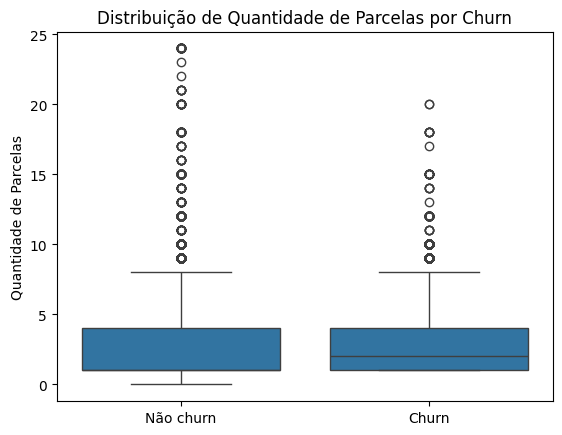

In [135]:
# Verificando a distribuição de quantidade de parcelas pelo churn
sns.boxplot(data=pedidos, x="churn", y="payment_installments")
plt.title("Distribuição de Quantidade de Parcelas por Churn")
plt.xticks([0, 1], ['Não churn', 'Churn'])
plt.xlabel('')
plt.ylabel("Quantidade de Parcelas")
plt.show()

- A quantidade de parcelas está distribuido bem parecido entre clientes que churnaram e não viraram churn.
- De acordo com alguns valores outliers percebemos que quantidade maiores de parcelas não se tornaram churn. Mas são poucos os dados.

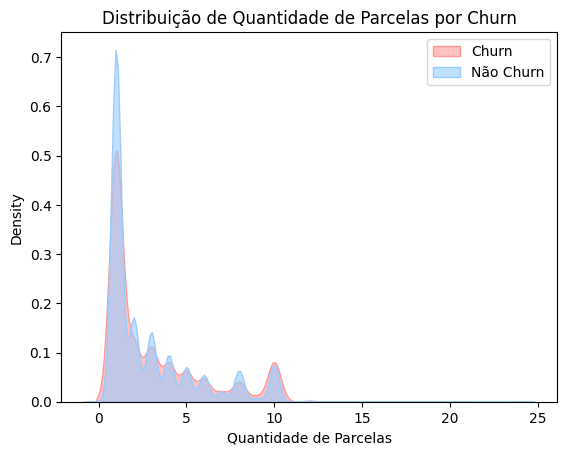

In [ ]:
# Vendo a distribuição da quantidade de parcelas com se o cliente é churn ou não
sns.kdeplot(data=pedidos[pedidos['churn'] == 1]['payment_installments'], label='Churn', shade=True, color='#FF9999', alpha=0.6)
sns.kdeplot(data=pedidos[pedidos['churn'] == 0]['payment_installments'], label='Não Churn', shade=True, color='#99CCFF', alpha=0.6)
plt.title('Distribuição de Quantidade de Parcelas por Churn')
plt.xlabel('Quantidade de Parcelas')
plt.legend()
plt.show()

<strong>Vamos usar novamente o teste de hipótese não-paramétrico, Teste U de Mann-Whitney, já que não temos uma distribuição normal para verificar se a quantidade de parcelas está empactando o churn ou não.</strong>

H0: Não há diferença significativa na mediana da quantidade de parcelas entre os clientes churn e não-churn. ``medidana_churn = mediana_nao_churn``

H1: Há uma diferença significativa na mediana na quantidade de parcelas entre os clientes churn e não-churn. Isso significa que a quantidade de parcelas pode influenciar o churn. ``mediana_churn != mediana_nao_churn``

Nível de Significância = 5%

In [137]:
# Separando amostras de quantidade de parcelas de churn e não churn
qtd_parcelas_churn = pedidos[pedidos['churn'] == 1]['payment_installments']
qtd_parcelas_nao_churn = pedidos[pedidos['churn'] == 0]['payment_installments']

# Calculando o teste de hipótese
statistic, p_value = stats.mannwhitneyu(qtd_parcelas_churn, qtd_parcelas_nao_churn, alternative='two-sided')

print(f'Mediana de quantidade de parcelas de churn: {qtd_parcelas_churn.median()}')
print(f'Mediana de quantidade de parcelas de não churn: {qtd_parcelas_nao_churn.median()}\n')

print(f"Estatística de Mann-Whitney U: {statistic}")
print(f"Valor p: {p_value}")

Mediana de quantidade de parcelas de churn: 2.0
Mediana de quantidade de parcelas de não churn: 1.0

Estatística de Mann-Whitney U: 1274333094.5
Valor p: 1.467930718930095e-29


- Como o p-valor foi menor que o nível de confiança, rejeitamos H0. 
- Isso significa que há evidências estatísticas fortes e suficientes para afirmar que existe uma diferença significativa na distribuição da quantidade de parcelas entre os clientes que viram churn e os que não viram churn.

<strong>Vamos olhar sobre a magnitude da diferença, que chamamos de tamanho do efeito, para isso vamos usar a medida de Correlação Bisseriana por Ranks (r), ela quantifica a força e a direção da relação entre o grupo (churn vs. não-churn) e a classificação (rank) da quantidade de parcelas.</strong>

1 - Valores próximos a 0 indicam um efeito pequeno.

2 - Valores de 0.1 a 0.3 são considerados um efeito pequeno.

3 - Valores de 0.3 a 0.5 são considerados um efeito médio.

4 - Valores acima de 0.5 são considerados um efeito grande.

In [138]:
# Calculando o tamanho do efeito usando o ranks
tamanho_amostra_parcelas_churn = len(qtd_parcelas_churn)
tamanho_amostra_parcelas_nao_churn = len(qtd_parcelas_nao_churn)
u_estatistica = statistic

r_rank = 1 - (2 * u_estatistica / (tamanho_amostra_parcelas_churn * tamanho_amostra_parcelas_nao_churn))

print(f'Correlação bisseriana por Rank (r): {r_rank:.4f}')

Correlação bisseriana por Rank (r): -0.0422


- Com o tamanho do efeito podemos ver que a diferença nas distribuições da quantidade de parcelas entre clientes churn e não-churn é detectável estatisticamente devido ao grande tamanho da amostra, mas essa diferença tem um impacto muito pequeno na prática.
- Como o valor da correlação bisseriana por ranks é -0.0422, muito pequeno. Isso significa que a magnitude prática dessa diferença é mínima. Ou seja, quantidade de parcelas é um fator associado ao churn, mas a força dessa associação é muito fraca.

<strong>5) Das 10 categorias de produtos mais vendidos, quais que deram mais churn? E das 10 categorias de produtos menos vendidos?</strong>

In [139]:
# Pegando da tabela de pedidos todos os pedidos das 10 top categorias de produtos
pedidos_top_10_categorias = pedidos[pedidos['product_category_name'].isin(top_10_categorias)]

In [140]:
# Tabela de contigência para ver qual categoria de produto teve mais churn
gerar_tabela_contigencia(pedidos_top_10_categorias, "product_category_name", "churn")

,Bom,Ruim
product_category_name,,
automotivo,0.060973,0.049337
beleza_saude,0.138199,0.116004
cama_mesa_banho,0.155872,0.168052
esporte_lazer,0.117961,0.125788
ferramentas_jardim,0.058998,0.067963
informatica_acessorios,0.110095,0.103212
moveis_decoracao,0.109505,0.142823
relogios_presentes,0.091347,0.052402
telefonia,0.061320,0.067963


- Das duas categorias de produtos que mais tiveram churn foi a categoria de cama_mesa_banho com 16.8% e a categoria de moveis_decoracao com 14.3%.

In [141]:
# Criando uma tabela de contigência com as cotegorias de produtos menos vendidas e relacionando com o churn
categorias_menos_pedidas = pedidos['product_category_name'].value_counts(ascending=True).head(10).index

pedidos_down_categorias = pedidos[pedidos['product_category_name'].isin(categorias_menos_pedidas)]

gerar_tabela_contigencia(pedidos_down_categorias, "product_category_name", "churn")

,Bom,Ruim
product_category_name,,
artes_e_artesanato,0.186992,0.018182
casa_conforto_2,0.130081,0.218182
cds_dvds_musicais,0.048780,0.145455
fashion_esporte,0.121951,0.290909
fashion_roupa_infanto_juvenil,0.040650,0.054545
flores,0.252033,0.000000
la_cuisine,0.048780,0.163636
pc_gamer,0.040650,0.090909
portateis_cozinha_e_preparadores_de_alimentos,0.121951,0.000000


- Das 10 categorias de produtos menos vendidas, a que mais deu churn foi a categoria de fashion_esporte com 29.1%, depois vem a categoria de casa_conforto_2 com 21.8%

<strong>Criação de Novas Colunas Relacionado à Períodos</strong>

Essas novas colunas de período vão ajudar a analisar como os pedidos se comportaram ao longo do tempo.

In [142]:
# Pegando o mês que foi o pedido
pedidos['order_month'] = pedidos['order_purchase_timestamp'].dt.month

# Pegando o ano que foi feito o pedido
pedidos['order_year'] = pedidos['order_purchase_timestamp'].dt.year

# Pegando os dados do dia da semana de cada pedido
pedidos['order_day_of_week'] = pedidos['order_purchase_timestamp'].dt.day

# Criando uma coluna para lidar com os dias da semana com nome
pedidos['order_name_day_of_week'] = pedidos['order_purchase_timestamp'].dt.day_name()

# Criando uma coluna que contém o trimestre dos pedidos
pedidos['order_quarter'] = pedidos['order_purchase_timestamp'].dt.quarter

In [143]:
# Agrupando os pedidos por ano e por mês
pedidos_mes = pedidos.groupby(['order_year', 'order_month']).size().reset_index(name='qtd_pedidos')
pedidos_mes

,order_year,order_month,qtd_pedidos
0,2016,9,3
1,2016,10,379
2,2016,12,1
3,2017,1,1011
4,2017,2,2058
5,2017,3,3174
6,2017,4,2841
7,2017,5,4404
8,2017,6,3794
9,2017,7,4848


- Como os meses do ano de 2016 tem poucos registros e o mês 9 de 2018 também tem pouco registro, vou excluir os dados que equivale a esses meses. Esses meses não estão acrescentando na nossa análise.

In [144]:
# Criando um dataframe onde eu vou retirar da base original os meses citados acima
pedidos_reduzido = pedidos[pedidos['order_year'] != 2016]
pedidos_reduzido = pedidos_reduzido[(pedidos_reduzido['order_year'] != 2018) | ((pedidos_reduzido['order_year'] == 2018) & (pedidos_reduzido['order_month'] != 9))]

pedidos_mes_reduzido = pedidos_reduzido.groupby(['order_year', 'order_month']).size().reset_index(name='qtd_pedidos')

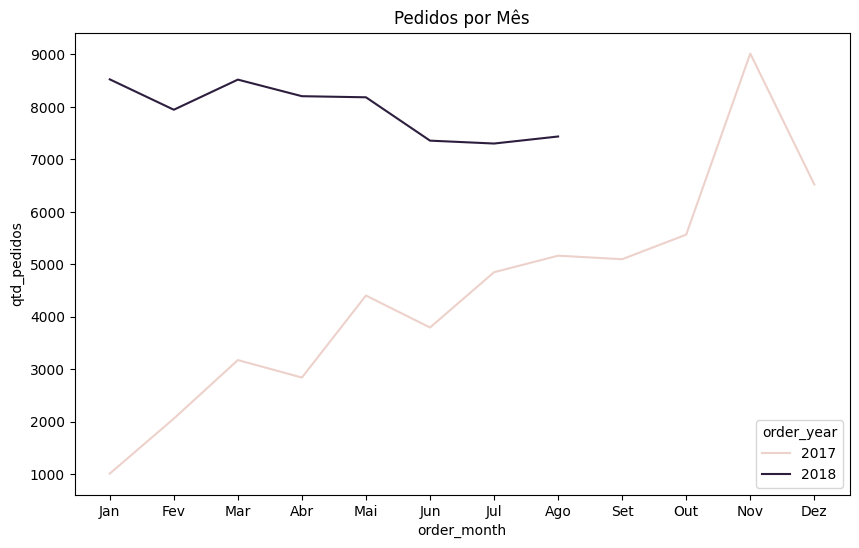

In [145]:
# Criando um gráfico de linhas para entender como se comporta os pedidos ao longo dos meses em cada ano
x_posicoes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
nome_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(10, 6))
sns.lineplot(data=pedidos_mes_reduzido, x='order_month', y='qtd_pedidos', hue='order_year', markers='0')
plt.xticks(x_posicoes, nome_meses)
plt.title("Pedidos por Mês")
plt.show()

- Apesar de só ter dados do ano de 2018 até o mês de Agosto, podemos ver que tiveram um crescimento muito superior em relação ao mesmo período do ano anterior.
- No ano de 2017 podemos ver um pico de pedidos no mês de Novembro, e isso pode está relacionado com a Black Friday. Como não temos esse mês no ano de 2018, não podemos ver de novo esse padrão.
- Apesar de os pedidos terem aumentado de um ano por outro, é possível ver uma queda de janeiro até agosto do ano de 2018.

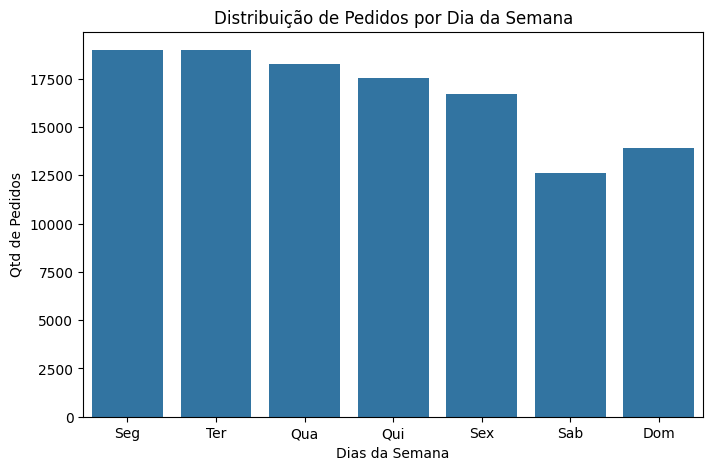

In [146]:
# Criando um gráfico de barras em relação a quantidade de pedidos em dias de semana
x_posicao_semana = [0, 1, 2, 3, 4, 5, 6]
nomes_dia_semana = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']

ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pedidos_reduzido['order_name_day_of_week'] = pd.Categorical(pedidos_reduzido['order_name_day_of_week'], categories=ordem_dias, ordered=True)

plt.figure(figsize=(8, 5))
sns.countplot(data=pedidos_reduzido, x='order_name_day_of_week')
plt.title("Distribuição de Pedidos por Dia da Semana")
plt.ylabel("Qtd de Pedidos")
plt.xlabel("Dias da Semana")
plt.xticks(x_posicao_semana, nomes_dia_semana)
plt.show()

- Quando comparamos os pedidos em relação ao dia da semana, vemos que Segunda e Terça são os dias da semana com maior número de pedidos.
- Apartir de Quarta os pedidos começam a cair, apesar de Quarda ainda ter muitos pedidos.
- E no final de semana vemos que os pedidos caem muito, ficando o sábado com o menor número de pedidos.

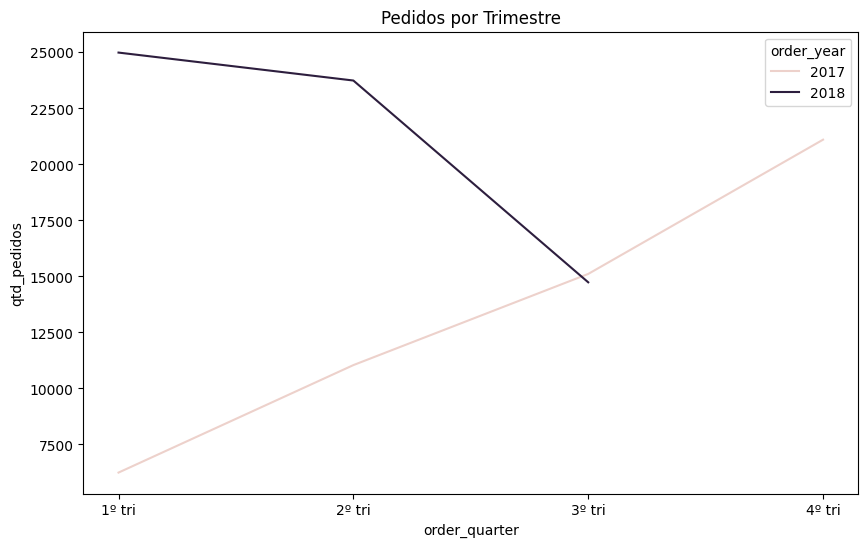

In [147]:
# Criando um gráfico de linhas para entender como se comporta os pedidos ao longo do trimestre de cada ano 
pedidos_por_trimestre = pedidos_reduzido.groupby(['order_year', 'order_quarter']).size().reset_index(name='qtd_pedidos')
x_posicoes_trimestre = [1, 2, 3, 4]
nome_trimestre = ['1º tri', '2º tri', '3º tri', '4º tri']

plt.figure(figsize=(10, 6))
sns.lineplot(data=pedidos_por_trimestre, x='order_quarter', y='qtd_pedidos', hue='order_year', markers='0')
plt.xticks(x_posicoes_trimestre, nome_trimestre)
plt.title("Pedidos por Trimestre")
plt.show()

- Comparando os 3 primeiros trimestre de cada ano, podemos ver que enquanto o ano de 2017 tem um crescimento no ano de 2018 é possível ver uma queda ao longo dos trimestres.
- No 3° trimestre é possível ver que eles se igualam na quantidade de pedidos nos dois anos.
- Existe uma queda brusca de acordo com o ano de 2018.

#### Conclusões

- Não conseguimos ver relações fortes entre algumas variáveis como o review_score, o preço, a quantidade de parcelas, o tipo de pagamento, com o churn. Vamos usar agora modelos de machine learning para buscar essa relação, descobrir quais são as variáveis que estão impactando mais no churn.

- Podemos ver de acordo com a base que os pedidos aumentaram muito de um ano para o outro. Mas é possível ver uma queda de pedidos no último ano de janeiro até agosto.

In [ ]:
# Salvando a base de dados de pedidos que foi alterada em outro arquivo
pedidos.to_csv("../data/data_processed/olist_orders_processed.csv", index=False)